In [5]:
sum(y == 3)

2

In [62]:
# import required packages
import pandas as pd
import numpy as np

# Modelling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

final_features = pd.read_csv('data/final.csv')
# final_features = final_features.drop(columns=['Unnamed: 0'])

X = final_features.drop(columns=['next_day_mood', 'date'])

# round the mood values to the nearest integer
y = final_features['next_day_mood']
y = y.round()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# # Oversampling the data to create balanced data using SMOTE
# sampling_dict = {3: 20,
#                  4: 20}
# oversample = SMOTE(sampling_strategy=sampling_dict, k_neighbors=1)
# X_train, y_train = oversample.fit_resample(X_train, y_train)

# sampling_dict = {3: 50,
#                 4: 50,
#                 5: 150,
#                 6: 200,
#                 7: sum(y_train == 7),
#                 8: sum(y_train == 8),
#                 9: 150}
# oversample = SMOTE(sampling_strategy=sampling_dict, k_neighbors=5)
# X_train, y_train = oversample.fit_resample(X_train, y_train)

## FITTING THE MODEL
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_leaf=15, max_features=10)
rf.fit(X_train, y_train)


# Predict the labels of the test set and test accuracy
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# print average, max and minimum depth of the trees
print(f"Average depth: {np.mean([estimator.tree_.max_depth for estimator in rf.estimators_])}")
print(f"Max depth: {np.max([estimator.tree_.max_depth for estimator in rf.estimators_])}")
print(f"Min depth: {np.min([estimator.tree_.max_depth for estimator in rf.estimators_])}")
print(f"Numer of trees: {len(rf.estimators_)}")

from sklearn.metrics import f1_score

print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")


Accuracy: 0.6273458445040214
Average depth: 9.682
Max depth: 15
Min depth: 6
Numer of trees: 500
F1 score: 0.593226912282975


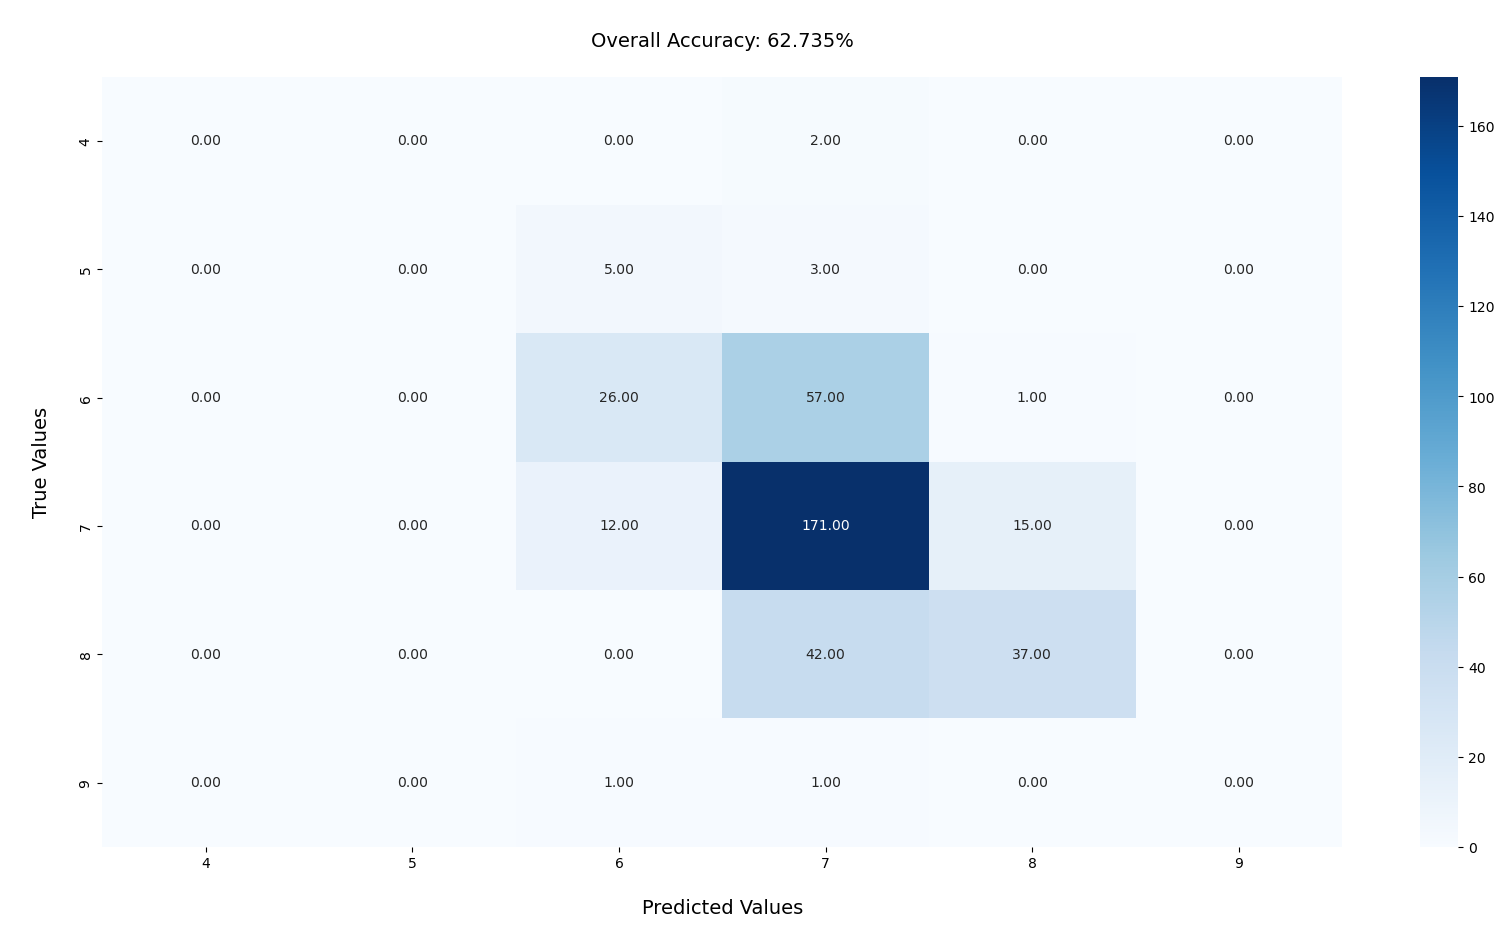

In [63]:
import matplotlib.pyplot as plt
import math
import seaborn as sns

y_pred = y_pred.astype('int')

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [4,5,6,7,8,9],columns = [4,5,6,7,8,9])
plt.figure(figsize = (20,10))
sns.heatmap(df_cm,  annot=True, cmap = 'Blues',fmt='.2f')
plt.title("\nOverall Accuracy: {}%\n".format(round((sum(cm.diagonal())/cm.sum())*100, 3)), size = 14)
plt.xlabel("\nPredicted Values\n", size = 14) 
plt.ylabel("\nTrue Values\n", size = 14) 
plt.show()



In [22]:
from sklearn.metrics import f1_score

print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")


F1 score: 0.5721095995507413
